In [1]:
import sys
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

/home/m/miniconda3/envs/miniconda352/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/m/miniconda3/envs/miniconda352/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/m/miniconda3/envs/miniconda352/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/m/miniconda3/envs/miniconda352/lib

In [2]:
#versions
print('python version: {}'.format(sys.version))
print('tensorflow version: {}.'.format(tf.__version__))
print('matplotlib version: {}'.format(matplotlib.__version__))
print('numpy version: {}.'.format(np.__version__))

python version: 3.5.2 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
tensorflow version: 1.14.0.
matplotlib version: 3.0.3
numpy version: 1.17.2.


In [3]:
mountains_img = np.array(image.load_img('mountains.png', target_size=(40, 40)))
car_img = np.array(image.load_img('car.png', target_size=(40, 40)))
together_imgs = np.array([mountains_img, car_img])
together_imgs.shape

(2, 40, 40, 3)

In [4]:
def simpleCNN_towers(image_tensor):

    image_slices = []
    for i in range(2):
        image_slice = layers.Lambda(lambda x: x[:, i, :, :, :])(image_tensor)
        image_slices.append(image_slice)

    model_input = layers.Input(shape=(40, 40, 3))
    model_output = layers.Conv2D(2, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(model_input)
    sample_model = tf.keras.models.Model(model_input, model_output)


    slice_outputs = []
    for image_slice in image_slices:
        slice_output = sample_model(image_slice)
        slice_outputs.append(slice_output)

    slice_outputs_concac = layers.concatenate(slice_outputs)
    out = layers.Dense(1000, activation='softmax')(slice_outputs_concac)

    return out

In [5]:
model_input = layers.Input(shape=(4, 40, 40, 3))
model_output = simpleCNN_towers(model_input)
model = tf.keras.models.Model(inputs=model_input, outputs=model_output)
model.compile(optimizer=tf.keras.optimizers.SGD(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


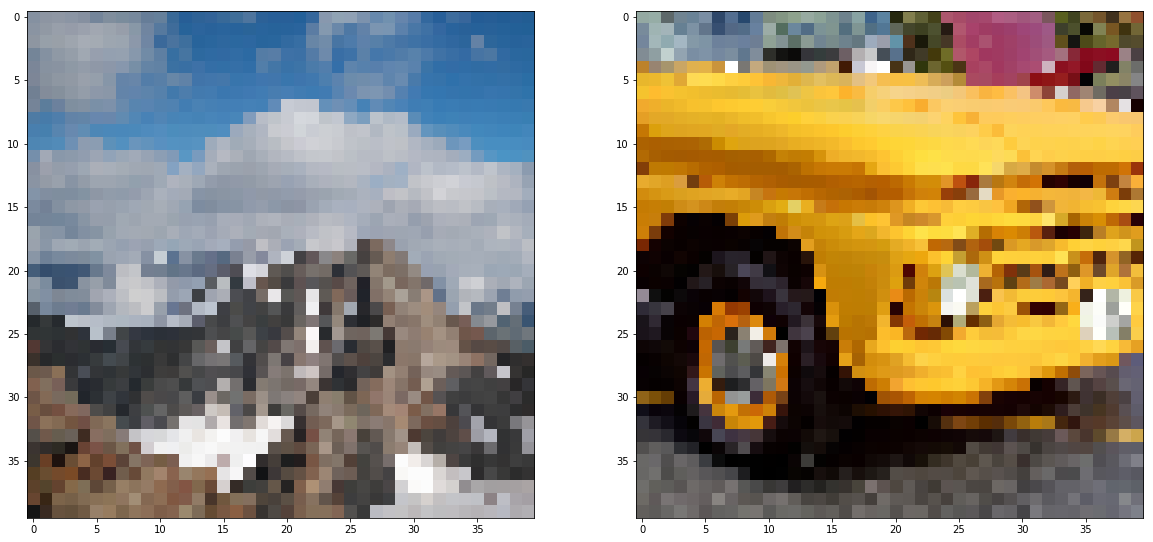

In [6]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(together_imgs[0, ...])
plt.subplot(1, 2, 2)
plt.imshow(together_imgs[1, ...])
plt.show()

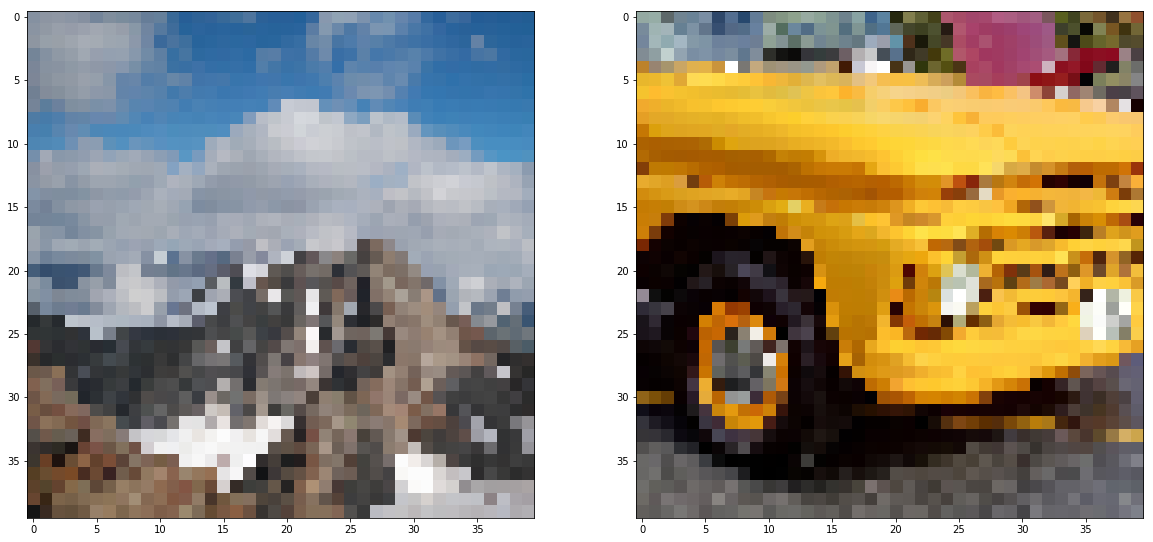

In [7]:
plt.figure(figsize=(20, 20))
for img_idx, i in enumerate([1,2]):
    inp = model.input
    test_fn = K.function([inp], [model.layers[i].output])
    test_img = test_fn(together_imgs[np.newaxis, ...])[0][0,...]
    plt.subplot(1, 2, img_idx+1)
    plt.imshow(test_img/255.)
plt.show()

In [8]:
model.save('model_save.h5')

In [9]:
loaded_model = tf.keras.models.load_model('model_save.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


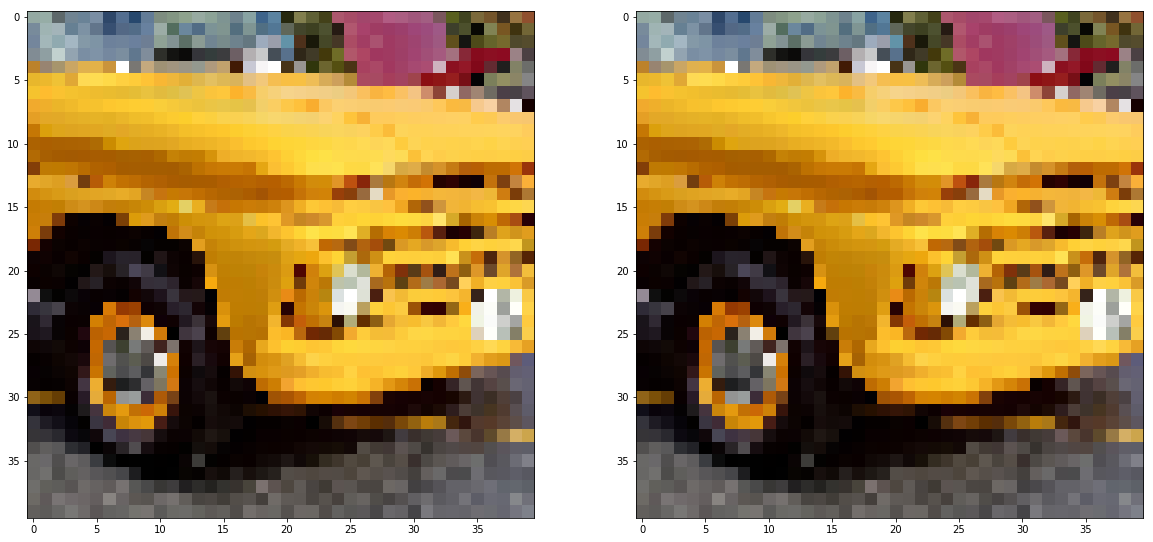

In [10]:
plt.figure(figsize=(20, 20))
for img_idx, i in enumerate([1,2]):
    inp = loaded_model.input
    test_fn = K.function([inp], [loaded_model.layers[i].output])
    test_img = test_fn(together_imgs[np.newaxis, ...])[0][0,...]
    plt.subplot(1, 2, img_idx+1)
    plt.imshow(test_img/255.)
plt.show()